In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm


CPU times: user 8.72 s, sys: 1.55 s, total: 10.3 s
Wall time: 13.8 s


In [3]:
name='ncra_regions'
regions=None
ds_gwl15=None
ds_gwl20=None
ds_gwl30=None
station_df=None
stippling=None
mask_not_australia=True
mask_australia=False
agcd_mask=False
facecolor="none"
edgecolor="black"
figsize=(10, 4)
title=None
date_range=""
crs=None
area_linewidth=0.3
xlim=(114,154)
ylim=(-43, -8)
cmap=cm.Greens
cmap_bad="lightgrey"
cbar_extend="both"
ticks=None
tick_labels=None
cbar_label=""
baseline=None
dataset_name=None
issued_date=None
label_states=False
contourf=False
contour=False
select_area=None
land_shadow=False
watermark="EXPERIMENTAL\nIMAGE ONLY"
watermark_color = "r"
show_logo = False
infile=None
outfile=None
savefig=True

regions = regions_dict["ncra_regions"]
regions = regions.to_crs(crs = "GDA2020")

In [4]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]



CPU times: user 4.04 s, sys: 1.93 s, total: 5.97 s
Wall time: 12.1 s


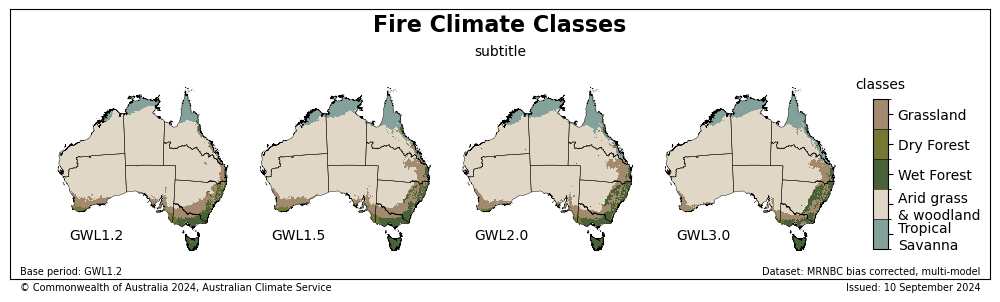

In [5]:
title = "Fire Climate Classes"
baseline="GWL1.2"
cmap = cmap_dict["fire_climate"]
ticks = tick_dict["fire_climate_ticks"]
tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",]
cbar_label = "classes"
dataset_name = "MRNBC bias corrected, multi-model"
watermark=""
figsize=(10, 3)
date_range="subtitle"


crs = ccrs.LambertConformal(
            central_latitude=-24.75,
            central_longitude=134.0,
            cutoff=30,
            standard_parallels=(-10, -40),
        )

fig, axs = plt.subplots(nrows=1, ncols=4,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False},)

cmap.set_bad(cmap_bad)
for i, ds in enumerate([ds_gwl12, ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds, 
                                          station_df = station_df,
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=cmap,
                                          cbar_extend=cbar_extend,
                                          ticks=ticks,
                                          tick_labels=tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs[i],
                                          figsize=figsize,
                                          subtitle=f"GWL{[1.2,1.5,2.0,3.0][i]}",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(left=0.05, bottom=0, right=0.85, top=0.95, wspace=0.05, hspace=0.05)
cbar_ax = fig.add_axes([0.87, 0.2, 0.03, 0.5]) #left bottom width height
cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=cbar_ax,
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds = [0.1,0,0.5,1],)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.1,0.98,0.9], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.9),
           "date_range": (0.5, 0.87),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)


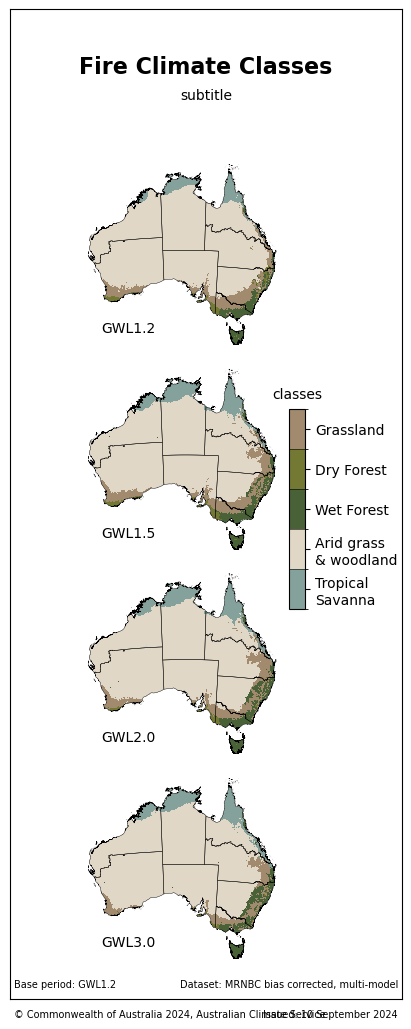

In [6]:
title = "Fire Climate Classes"
baseline="GWL1.2"
cmap = cmap_dict["fire_climate"]
ticks = tick_dict["fire_climate_ticks"]
tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",]
cbar_label = "classes"
dataset_name = "MRNBC bias corrected, multi-model"
watermark=""
figsize=(4, 10)
date_range="subtitle"


fig, axs = plt.subplots(nrows=4, ncols=1,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False},)

cmap.set_bad(cmap_bad)
for i, ds in enumerate([ds_gwl12, ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds, 
                                          station_df = station_df,
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=cmap,
                                          cbar_extend=cbar_extend,
                                          ticks=ticks,
                                          tick_labels=tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs[i],
                                          figsize=figsize,
                                          subtitle=f"GWL{[1.2,1.5,2.0,3.0][i]}",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.85, wspace=0.05, hspace=0.1)
cbar_ax = fig.add_axes([0.7, 0.4, 0.08, 0.2]) #left bottom width height
cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=cbar_ax,
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds = [0.1,0,0.5,1],)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.01,0.98,0.99], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.93),
           "date_range": (0.5, 0.92),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)

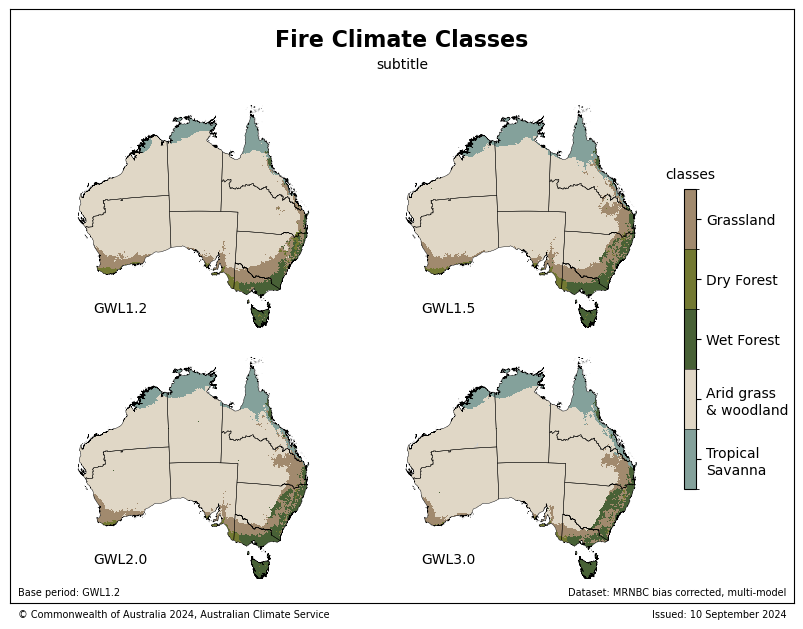

In [7]:
title = "Fire Climate Classes"
baseline="GWL1.2"
cmap = cmap_dict["fire_climate"]
ticks = tick_dict["fire_climate_ticks"]
tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",]
cbar_label = "classes"
dataset_name = "MRNBC bias corrected, multi-model"
watermark=""
figsize=(8, 6)
date_range="subtitle"


fig, axs = plt.subplots(nrows=2, ncols=2,  sharey=True, sharex=True, figsize=figsize, subplot_kw={'projection': crs, "frame_on":False},)

cmap.set_bad(cmap_bad)
for i, ds in enumerate([ds_gwl12, ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds, 
                                          station_df = station_df,
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=cmap,
                                          cbar_extend=cbar_extend,
                                          ticks=ticks,
                                          tick_labels=tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs.flatten()[i],
                                          figsize=figsize,
                                          subtitle=f"GWL{[1.2,1.5,2.0,3.0][i]}",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    
    # if select a specific area -----------
    ax = plot_select_area(select_area=select_area, 
                          ax=ax,
                          xlim=xlim,
                          ylim=ylim,
                          regions=regions,
                          land_shadow=land_shadow,
                          area_linewidth=area_linewidth,
                          )
    # ---------------------------------------------

                
    ax.axis('off')

# colorbar -----------------------------------------------------------
fig.subplots_adjust(left=0.05, bottom=0.05, right=0.85, top=0.85, wspace=0.05, hspace=0.1)
cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.5]) #left bottom width height
cbar_ax.axis('off')

ax = plot_cbar(cont=cont,
              norm=norm,
              ax=cbar_ax,
              cbar_extend=cbar_extend, 
              cbar_label=cbar_label,
              ticks=ticks, 
              tick_labels=tick_labels,
              middle_ticks=middle_ticks,
              cax_bounds = [0.1,0,0.5,1],)
#------------------------------------------


# plot border and annotations -----------------
ax111 = fig.add_axes([0.01,0.01,0.98,0.99], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# text annotation xy locations for 3-panel plot
text_xy_3pp = {"title": (0.5, 0.93),
           "date_range": (0.5, 0.92),
           "watermark": (0.45, 0.41),}

ax111 = plot_titles(title=title,
                    date_range = date_range, 
                    baseline = baseline, 
                    dataset_name= dataset_name,
                    issued_date=issued_date,
                    watermark=watermark, 
                    watermark_color=watermark_color,
                    ax=ax111,
                    text_xy = text_xy_3pp,
                    title_ha = "center",
               )
ax111.axis(True)
# --------------------------------------------

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)

In [83]:
def plot_acs_hazard_1plus3(
                name='ncra_regions',
                regions=None,
                ds_gwl12=None,
                gwl12_cmap=cm.Greens,
                gwl12_cbar_extend="both",
                gwl12_cbar_label=None,
                gwl12_ticks=None,
                gwl12_tick_labels=None,
                ds_gwl15=None,
                ds_gwl20=None,
                ds_gwl30=None,
                mask_not_australia=True,
                mask_australia=False,
                agcd_mask=False,
                facecolor="none",
                edgecolor="black",
                figsize=None,
                title=None,
                date_range="",
                crs=None,
                area_linewidth=0.3,
                xlim=(113, 154),
                ylim=(-43, -10),
                cmap=cm.Greens,
                cmap_bad="lightgrey",
                cbar_extend="both",
                ticks=None,
                tick_labels=None,
                cbar_label="",
                baseline=None,
                dataset_name=None,
                issued_date=None,
                label_states=False,
                contourf=False,
                contour=False,
                select_area=None,
                land_shadow=False,
                watermark="EXPERIMENTAL\nIMAGE ONLY",
                watermark_color = "r",
                show_logo = False,
                infile=None,
                outfile=None,
                savefig=True,
                orientation="horizontal",
            ):
    """2-by-2 layout. 1 baseline plot and 3 future scenario plots"""

    
    if orientation=="horizontal":
        cax_bounds = [1.05,0,0.1,1]
        tick_rotation = 0
        nrows = 1
        ncols = 4
        cbar_location = "right"
        plots_rect = (0.01,0.05,0.98,0.85) #left bottom width height
        # text annotation xy locations
        text_xy = {"title": (0.5, 0.9),
                   "date_range": (0.5, 0.87),
                   "watermark": (0.45, 0.41),}
        if figsize is None:
            figsize=(10, 3)
        
    elif orientation=="vertical":
        cax_bounds = [-0.1,-0.3,1.2,0.1]
        tick_rotation = -90
        nrows = 4
        ncols = 1
        cbar_location = "bottom"
        plots_rect = (0.01,0.05,0.98,0.85) #left bottom width height
        # text annotation xy locations
        text_xy = {"title": (0.5, 0.96),
               "date_range": (0.5, 0.95),
               "watermark": (0.45, 0.41),}
        if figsize is None:
            figsize=(5,12)
        
    elif orientation=="square":
        cax_bounds = [1.05,0,0.1,1]
        tick_rotation = 0
        nrows = 2
        ncols = 2
        cbar_location = "right"
        plots_rect = (0.01,0.05,0.98,0.85) #left bottom width height
        # text annotation xy locations
        text_xy = {"title": (0.5, 0.96),
                   "date_range": (0.5, 0.95),
                   "watermark": (0.45, 0.41),}
        if figsize is None:
            figsize=(8,6)
    else:
        print('orientation must be one of ["horizontal", "vertical", "square"]')
    
        
    

    if regions is None:
        try:
            regions = regions_dict[name]
        except:
            print(f"Could not read regions_dict[{name}]")

    regions = regions.to_crs(crs = "GDA2020")

    # Set default crs for Australia maps and selection maps
    if crs is None:
        if select_area is None:
            # Default for Australian map
            crs = ccrs.LambertConformal(
                central_latitude=-24.75,
                central_longitude=134.0,
                cutoff=30,
                standard_parallels=(-10, -40),
            )
        else:
            crs = ccrs.PlateCarree()

    
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols,  sharey=True, sharex=True, figsize=figsize, layout="constrained", subplot_kw={'projection': crs, "frame_on":False},)
    
    cmap.set_bad(cmap_bad)

    # -------- plot baseline plot and its colorbar ---------------------
    ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                          data=ds_gwl12, 
                                          xlim=xlim,
                                          ylim=ylim,
                                          cmap=gwl12_cmap,
                                          cbar_extend=gwl12_cbar_extend,
                                          ticks=gwl12_ticks,
                                          tick_labels=gwl12_tick_labels,
                                          contourf=contourf,
                                          contour=contour,
                                          ax=axs.flatten()[0],
                                          figsize=figsize,
                                          subtitle=f"GWL1.2",
                                          facecolor=facecolor,
                                          mask_not_australia = mask_not_australia,
                                          mask_australia=mask_australia,
                                          agcd_mask=agcd_mask,
                                          area_linewidth=area_linewidth,
                                          stippling=stippling)
    cbar = plot_cbar(cont=cont,
                  norm=norm,
                  ax=axs.flatten()[0],
                  cbar_extend=gwl12_cbar_extend, 
                  cbar_label=gwl12_cbar_label,
                  ticks=gwl12_ticks, 
                  tick_labels=gwl12_tick_labels,
                  middle_ticks=middle_ticks,
                  cax_bounds=cax_bounds,
                  location=cbar_location)
    cbar.ax.tick_params(rotation=tick_rotation)
    # ------- end plot baseline plot and its colorbar ---------------------

    # ------- plot three scenarios as anomalies from baseline--------------
    for i, ds in enumerate([ds_gwl15, ds_gwl20, ds_gwl30]):
        ax, norm, cont, middle_ticks = plot_data(regions=regions,
                                                  data=ds, 
                                                  xlim=xlim,
                                                  ylim=ylim,
                                                  cmap=cmap,
                                                  cbar_extend=cbar_extend,
                                                  ticks=ticks,
                                                  tick_labels=tick_labels,
                                                  contourf=contourf,
                                                  contour=contour,
                                                  ax=axs.flatten()[i+1],
                                                  figsize=figsize,
                                                  subtitle=f"GWL{[1.5,2.0,3.0][i]}",
                                                  facecolor=facecolor,
                                                  mask_not_australia = mask_not_australia,
                                                  mask_australia=mask_australia,
                                                  agcd_mask=agcd_mask,
                                                  area_linewidth=area_linewidth,
                                                  stippling=stippling)
        
        # if select a specific area -----------
        ax = plot_select_area(select_area=select_area, 
                              ax=ax,
                              xlim=xlim,
                              ylim=ylim,
                              regions=regions,
                              land_shadow=land_shadow,
                              area_linewidth=area_linewidth,
                              )
        # ---------------------------------------------                    
        ax.axis('off')
    
    # colorbar -----------------------------------------------------------
    cbar = plot_cbar(cont=cont,
                  norm=norm,
                  ax=axs.flatten()[-1],
                  cbar_extend=cbar_extend, 
                  cbar_label=cbar_label,
                  ticks=ticks, 
                  tick_labels=tick_labels,
                  middle_ticks=middle_ticks,
                  cax_bounds =cax_bounds,
                  location=cbar_location)
    cbar.ax.tick_params(rotation=tick_rotation)
    
    #------------------------------------------
    
    
    # plot border and annotations -----------------
    fig.get_layout_engine().set(rect=plots_rect)
    
    ax111 = fig.add_axes([0.01,0.01,0.98,0.98], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)
    

    
    ax111 = plot_titles(title=title,
                        date_range = date_range, 
                        baseline = baseline, 
                        dataset_name= dataset_name,
                        issued_date=issued_date,
                        watermark=watermark, 
                        watermark_color=watermark_color,
                        ax=ax111,
                        text_xy = text_xy,
                        title_ha = "center",
                   )
    ax111.axis(True)
    # --------------------------------------------
    
    if outfile is None:
        PATH = os.path.abspath(os.getcwd())
        outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
        os.makedirs(os.path.dirname(outfile), exist_ok=True)
    
    if savefig:
        plt.savefig(outfile, dpi=300)
    return fig, ax


CPU times: user 2min 9s, sys: 292 ms, total: 2min 9s
Wall time: 2min 10s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

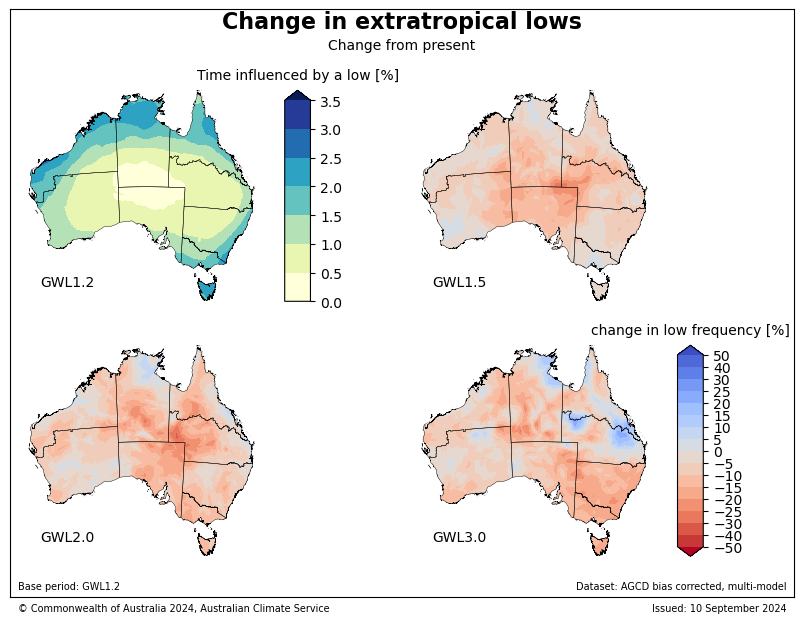

In [84]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square"
                        )

CPU times: user 2min 7s, sys: 301 ms, total: 2min 7s
Wall time: 2min 8s


(<Figure size 1000x300 with 5 Axes>, <GeoAxes: >)

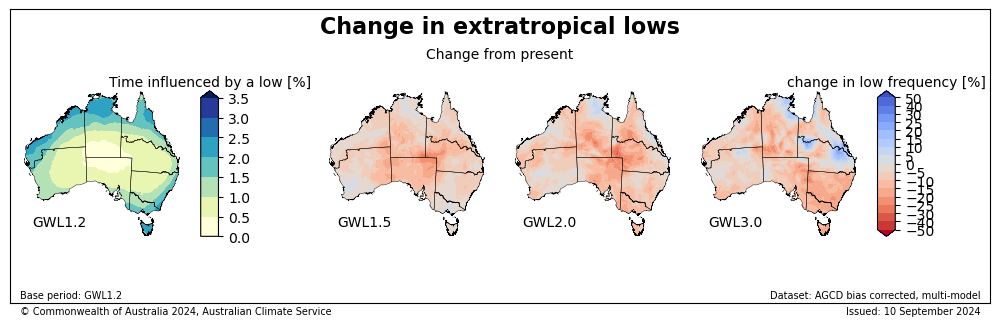

In [81]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="horizontal"
                        )

CPU times: user 2min 7s, sys: 289 ms, total: 2min 7s
Wall time: 2min 8s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

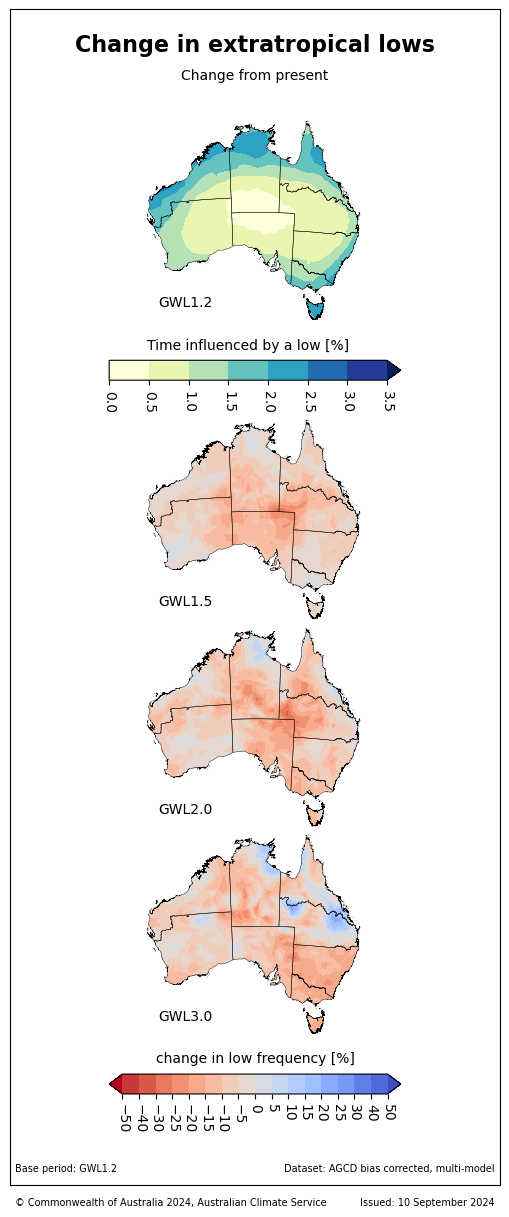

In [82]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical"
                        )